In [ ]:
# Transfer learning is a deep learning technique where we use a pre trained model. This pretrained model is trained for one task and can be re-trained for a similar task for a smaller dataset
# This gives a higher accuracy than models that are trained from the start
# Should be a similar model (image recognition - image recognition)

# Examples of pretained models -
# VGG - 16
# inceptionV3
# ResNet50
# MobileNet V2 using this

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshh21","key":"a2ae428b98ebadf82ed5c18961c17cd0"}'}

In [ ]:
# !pip install kaggle
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Importing Dog vs Cat Dataset
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:05<00:00, 174MB/s]
100% 812M/812M [00:05<00:00, 157MB/s]


In [ ]:
# extracting compressed dataset
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
# extracting train zip
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
# counting the number of files in train folder
print(len(os.listdir("/content/train")))

25000


In [ ]:
file_names = os.listdir("/content/train")

In [ ]:
print(file_names[:10])

['dog.12192.jpg', 'cat.10840.jpg', 'dog.8033.jpg', 'dog.5652.jpg', 'dog.10866.jpg', 'dog.11388.jpg', 'dog.6811.jpg', 'dog.6367.jpg', 'cat.10686.jpg', 'dog.10732.jpg']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

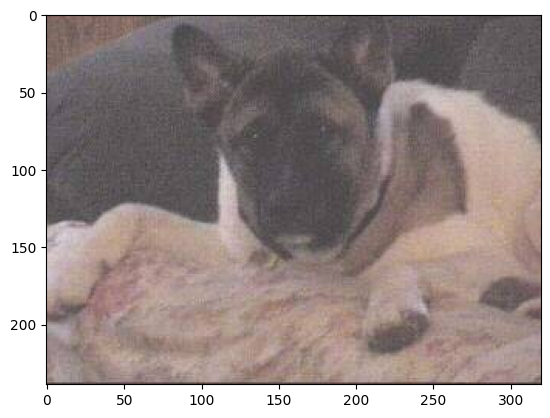

In [ ]:
img = mpimg.imread("/content/train/dog.12192.jpg")
plt.imshow(img)

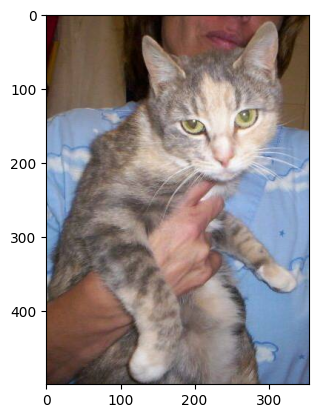

In [ ]:
img = Image.open("/content/train/cat.10840.jpg")
plt.imshow(img)

In [ ]:

file_names = os.listdir("/content/train")

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
dog
dog
dog


In [ ]:
# counting dog miages and cat images
file_names = os.listdir("/content/train")

dog_count = 0
cat_count = 0

for i in range(len(file_names)):
  name = file_names[i]
  if name[0:3] == "dog":
    dog_count += 1
  else:
    cat_count += 1

print(dog_count)
print(cat_count)


12500
12500


In [ ]:
# Resizing images and creeating a new directory
os.mkdir('/content/resized_images')

In [ ]:
orignal_folder = "/content/train/"
resized_folder = "/content/resized_images/"

for i in range(2000):
  filename = os.listdir(orignal_folder)[i]
  img_path = orignal_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")
  new_img_path = resized_folder+filename
  img.save(new_img_path)


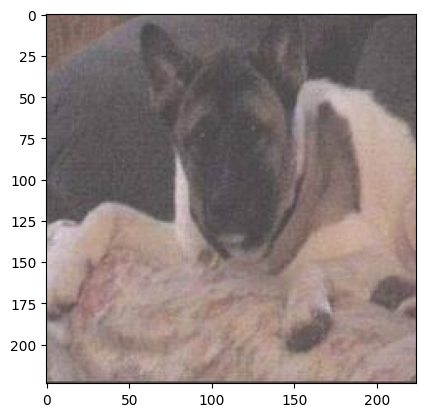

In [ ]:
# displaying resized dog image
img = mpimg.imread("/content/resized_images/dog.12192.jpg")
plt.imshow(img)

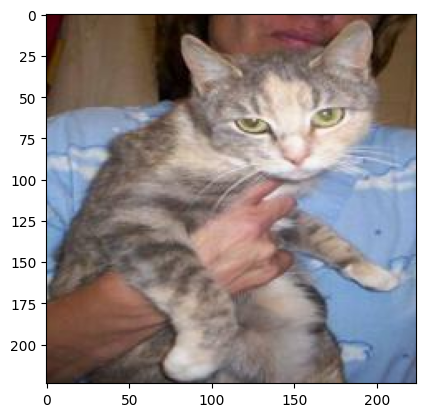

In [ ]:
# displaying resized cat image
img = mpimg.imread("/content/resized_images/cat.10840.jpg")
plt.imshow(img)

In [ ]:
# Creating label for the images

# dog --> 1
# cat --> 0
filenames = os.listdir("/content/resized_images")
labels = []
for i in range(2000):
  file_name = filenames[i]
  if file_name[0:3] == "dog":
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(len(labels))
print(labels[:10])
print(labels[-10:])
print(type(labels))

2000
[1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
<class 'list'>


In [ ]:
# counting images of dogs and cats
values , counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1010  990]


In [ ]:
# Covnerting resized images to numpy array
import glob

In [ ]:
image_directory = '/content/resized_images/'
image_extensions = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
dog__cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
X = dog__cat_images
Y = np.asarray(labels)

In [ ]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X.shape)
print(Y.shape)

(2000, 224, 224, 3)
(2000,)


In [ ]:
# Splitting data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)


In [ ]:
# Scaling our data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled[0])
print(X_test_scaled[0])

[[[0.78039216 0.71372549 0.72941176]
  [0.8        0.73333333 0.74901961]
  [0.81176471 0.74509804 0.76078431]
  ...
  [0.79215686 0.7254902  0.7372549 ]
  [0.80784314 0.74117647 0.75294118]
  [0.82352941 0.75686275 0.76862745]]

 [[0.78431373 0.71764706 0.73333333]
  [0.79607843 0.72941176 0.74509804]
  [0.80392157 0.7372549  0.75294118]
  ...
  [0.80784314 0.74117647 0.75294118]
  [0.81960784 0.75294118 0.76470588]
  [0.83137255 0.76470588 0.77647059]]

 [[0.79215686 0.7254902  0.74117647]
  [0.79215686 0.7254902  0.74117647]
  [0.79215686 0.7254902  0.74117647]
  ...
  [0.80392157 0.7372549  0.74901961]
  [0.81176471 0.74509804 0.75686275]
  [0.81960784 0.75294118 0.76470588]]

 ...

 [[0.77254902 0.71372549 0.72941176]
  [0.77647059 0.71764706 0.73333333]
  [0.78039216 0.72156863 0.7372549 ]
  ...
  [0.64313725 0.66666667 0.75686275]
  [0.65490196 0.67058824 0.76470588]
  [0.65882353 0.6745098  0.76862745]]

 [[0.77254902 0.71372549 0.72941176]
  [0.77647059 0.71764706 0.73333333]


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Dropout , GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights="imagenet")
# Freeze the base model
base_model.trainable = False

model = Sequential([
  base_model, # if you are using base_model as input layer you dont need to define shape as long as it is defined in the model itself
  GlobalAveragePooling2D(),
  Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9866 - loss: 0.0417
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9944 - loss: 0.0272
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9978 - loss: 0.0214
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9956 - loss: 0.0175
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9987 - loss: 0.0155


In [ ]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9696 - loss: 0.0661


Enter the path of the image : /content/dog.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.06119797 0.80025935]]
1
The image is of a dog


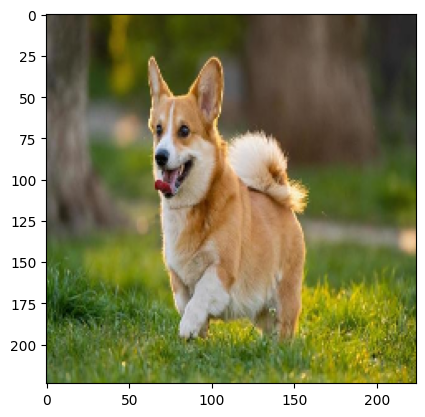

In [ ]:
# Building a predictive system
input_img_path = input("Enter the path of the image : ")
input_img = cv2.imread(input_img_path)
input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB)
input_img_resize = cv2.resize(input_img,(224,224))
plt.imshow(input_img_resize)
input_img_scaled = input_img_resize/255
input_img_reshaped = np.reshape(input_img_scaled,[1,224,224,3])
prediction = model.predict(input_img_reshaped)
print(prediction)

prediction_label = np.argmax(prediction)
print(prediction_label)

if prediction_label == 0:
  print("The image is of a cat")
else:
  print("The image is of a dog")

Enter the path of the image : /content/cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[9.7284120e-01 7.7049475e-04]]
0
The image is of a cat


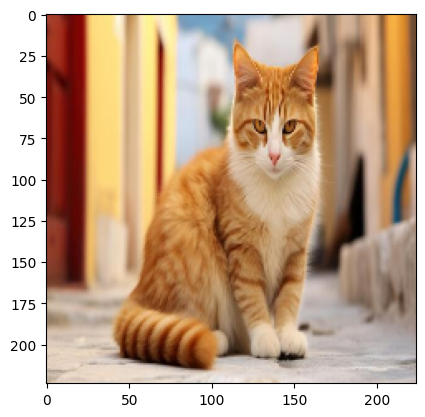

In [ ]:
# Building a predictive system
input_img_path = input("Enter the path of the image : ")
input_img = cv2.imread(input_img_path)
input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB)
input_img_resize = cv2.resize(input_img,(224,224))
plt.imshow(input_img_resize)
input_img_scaled = input_img_resize/255
input_img_reshaped = np.reshape(input_img_scaled,[1,224,224,3])
prediction = model.predict(input_img_reshaped)
print(prediction)

prediction_label = np.argmax(prediction)
print(prediction_label)

if prediction_label == 0:
  print("The image is of a cat")
else:
  print("The image is of a dog")